In [1]:
from rimport import rimport
from astropy.io import fits as pyfits
import numpy as np
from matplotlib import pyplot as plt
%matplotlib notebook

In [2]:
flexiPlot = rimport('https://dubshen.astro.su.se/~flca3632/synthetic/plotpol.py','flexiPlot')

In [3]:
cc = 2.99792458e10 # Speed of light [cm/s] as defined in MULTI3D

In [4]:
# Stokes I
hdulist = pyfits.open('https://dubshen.astro.su.se/~flca3632/synthetic/mu085-fullstokes/ie.ca2_8542A_mu0.85.muram_plage_580000.1024x1024x673.fits')
data_ie = np.copy(hdulist['DATA'].data)

# Wavelengths in A, vacuum wavelengths (!)
w = cc/hdulist['wavelength axis'].data*1.e8

# Spatial extension
extXs = hdulist['DATA'].header['CRVAL1']
extXe = extXs + hdulist['DATA'].header['CDELT1']*(hdulist['DATA'].header['NAXIS1']-1)
extYs = hdulist['DATA'].header['CRVAL2']
extYe = extYs + hdulist['DATA'].header['CDELT2']*(hdulist['DATA'].header['NAXIS2']-1)
hdulist.close()

# Stokes Q
hdulist = pyfits.open('https://dubshen.astro.su.se/~flca3632/synthetic/mu085-fullstokes/qe.ca2_8542A_mu0.85.muram_plage_580000.1024x1024x673.fits')
data_qe = np.copy(hdulist['DATA'].data)/data_ie
hdulist.close()

# Stokes U
hdulist = pyfits.open('https://dubshen.astro.su.se/~flca3632/synthetic/mu085-fullstokes/ue.ca2_8542A_mu0.85.muram_plage_580000.1024x1024x673.fits')
data_ue = np.copy(hdulist['DATA'].data)/data_ie
hdulist.close()

# Stokes V
hdulist = pyfits.open('https://dubshen.astro.su.se/~flca3632/synthetic/mu085-fullstokes/ve.ca2_8542A_mu0.85.muram_plage_580000.1024x1024x673.fits')
data_ve = np.copy(hdulist['DATA'].data)/data_ie
hdulist.close()

<IPython.core.display.Javascript object>


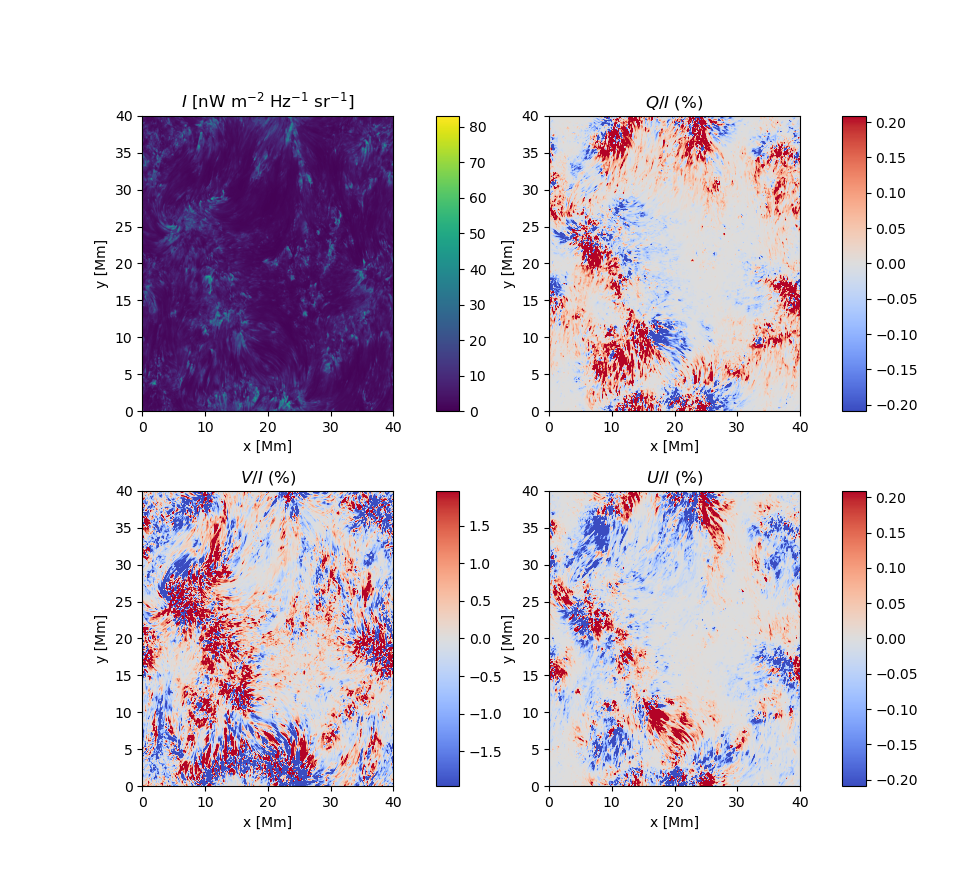

In [5]:
ff      = 50 # Line core is around ff=50
aspect  = 1./.85

iunit   = 1.e-7*1.e9*1.e4
quvunit = 1.e2

ithr    = np.max(data_ie[ff,:,:]*iunit)
dataqu  = np.array([abs(data_qe[ff,:,:]),abs(data_ue[ff,:,:])])
quthr   = np.percentile(dataqu*quvunit,90.)
vthr    = np.percentile(data_ve[ff,:,:]*quvunit,90.)

vmins   = ((0.,-quthr),(-vthr,-quthr))
vmaxs   = ((ithr,quthr),(vthr,quthr))
extent  = [extXs,extXe,extYs,extYe]

titles  = (('$I$ [nW m$^{-2}$ Hz$^{-1}$ sr$^{-1}$]','$Q/I$ (%)'),('$V/I$ (%)','$U/I$ (%)'))
colors  = ((plt.cm.viridis,plt.cm.coolwarm),(plt.cm.coolwarm,plt.cm.coolwarm))

xlabels = (('x [Mm]','x [Mm]'),('x [Mm]','x [Mm]'))
ylabels = (('y [Mm]','y [Mm]'),('y [Mm]','y [Mm]'))

fig,ax  = flexiPlot((data_ie[ff,:,:]*iunit,data_qe[ff,:,:]*quvunit),(data_ve[ff,:,:]*quvunit,data_ue[ff,:,:]*quvunit),aspect=aspect,extent=extent,vmins=vmins,vmaxs=vmaxs,colors=colors,titles=titles,xlabels=xlabels,ylabels=ylabels)